# Lab 7

This report shows how and event selection optimization is performed using a set of Higgs boson training data. 
When the event selection is performed on a data set, the signal discovery sensitivity is optimized which ultimately enhances our signal analysis.


In [811]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

### Importing training data

In [812]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(infile)

# list all keys of the files
#higgs.keys()

In [813]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile2 = open ("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(infile2)

# list all keys of the files
#qcd.keys()

In [814]:
# first plot the signal data then plot the background data

start = 0 
end = higgs.size

pt = higgs['pt'][start:end]
eta = higgs['eta'][start:end]
phi = higgs['phi'][start:end]
mass = higgs['mass'][start:end]
ee2 = higgs['ee2'][start:end]
ee3 = higgs['ee3'][start:end]
d2 = higgs['d2'][start:end]
angularity = higgs['angularity'][start:end]
t1 = higgs['t1'][start:end]
t2 = higgs['t2'][start:end]
t3 = higgs['t3'][start:end]
t21 = higgs['t21'][start:end]
t32 = higgs['t32'][start:end]
delta_R = higgs['KtDeltaR'][start:end]

In [815]:
pt_bkg = qcd['pt'][start:end]
eta_bkg = qcd['eta'][start:end]
phi_bkg = qcd['phi'][start:end]
mass_bkg = qcd['mass'][start:end]
ee2_bkg = qcd['ee2'][start:end]
ee3_bkg = qcd['ee3'][start:end]
d2_bkg = qcd['d2'][start:end]
angularity_bkg = qcd['angularity'][start:end]
t1_bkg = qcd['t1'][start:end]
t2_bkg = qcd['t2'][start:end]
t3_bkg = qcd['t3'][start:end]
t21_bkg = qcd['t21'][start:end]
t32_bkg = qcd['t32'][start:end]
delta_R_bkg = qcd['KtDeltaR'][start:end]

For the low Pt data, the expected number of Higgs event is equal to 100. This is the signal value to be used against the background qcd that has a poisson distribution with mean value equivalentis the expected number of background event equal to 20,000.

In [524]:
# The distribution of the background is a poisson with mu = 20000
N_qcd = 20000
x = range(0,N_qcd+1000)
mu = 20000
dist_bkg = stats.poisson.pmf(x, mu)

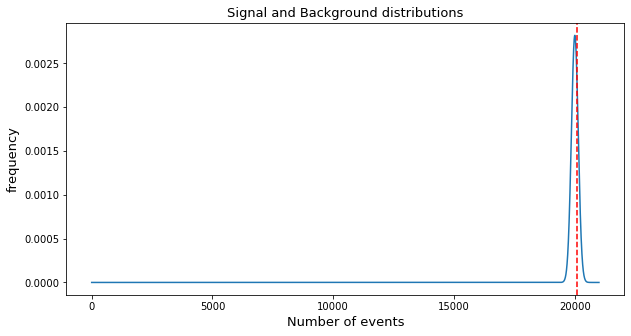

In [525]:
fig, axes = plt.subplots(figsize=(10,5))
size = 13
N_higgs = 100
signal = N_higgs + mu

axes.plot(dist_bkg)
axes.axvline(signal, color='r', linestyle="--")
axes.set_xlabel('Number of events', fontsize = size)
axes.set_ylabel('frequency', fontsize = size)
axes.set_title('Signal and Background distributions', fontsize = size);

The above plot shows the background qcd and the signal relative to the qcd background.

The below calculation show how to assess the significance of the signal when no event selection has been made. To get relevant signal significance with the given background distribution, the signal, which is the expected yields of the number of Higgs event is inflated by the expected yields of the number of background qcd. 

The typical calculation of the significance of of the signal would be to calculate the integrated probability of that signal using the poisson distribution and to convert that probaiblity to the sigma using the normal distribution.

In [526]:
prob = stats.poisson.cdf(signal, N_qcd)
print('The probability  = {:.2%}'.format(prob))

sigma = stats.norm.ppf(prob)
print('The sigma is = {:.2f}'.format(sigma))


The probability  = 76.15%
The sigma is = 0.71


However, the following calcuation shows a simpler way to calculate the significance of the signal. As you can see here, the ratio of expected yields of the number of the Higgs event to the expected yields of the number of the background qcd is equivalent to the significance of the signal.

In [527]:
import math
N_higgs =  100
N_qcd = 20000
ratio = N_higgs/math.sqrt(N_qcd)
print('The significance  = {:.2f}'.format(ratio))

The significance  = 0.71


The significance of the signal, N(Higgs) = 100, is 0.71. Without any event selection, the signal is not significant enough to be distinguished from the background. In this case, no discovery will be made.

# Using invariant mass to perform the first event selection by cutting the training data

The plot below shows the histrogram of the Higgs mass and the qcd mass. The qcd mass distribution is much flatter and spread out compared to the Higgs mass.

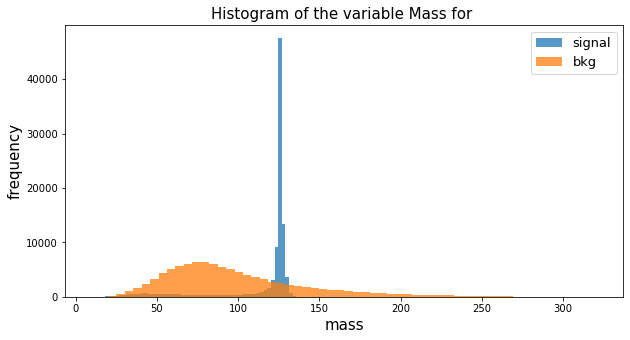

In [528]:
fig, axes = plt.subplots(figsize=(10,5))

bin_size = 60
plt.hist(mass,label = 'signal', bins = bin_size, alpha = 0.75)
plt.hist(mass_bkg,label = 'bkg', bins = bin_size, alpha = 0.75)

size = 15
leg_size = 13
axes.set_xlabel('mass', fontsize=size)
axes.set_ylabel('frequency', fontsize=size)
axes.set_title("Histogram of the variable Mass for ", fontsize=size)
axes.legend(loc=1, fontsize=leg_size);

### Try different mass cuts

#### Cut1 : cut the data at mass = 100 and 150

In [529]:
counts = np.bincount(mass)
print('The mean value of the mass = ',np.argmax(counts))

The mean value of the mass =  125


In [530]:
mean_value = np.argmax(counts)
n = 25
n_left = mean_value - n
n_right = mean_value + n

mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 

for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
        mass_cut = np.append(mass_cut, mass[i])
        
for i in range(0, mass_bkg.size):
    if mass_bkg[i]> n_left and mass_bkg[i] < n_right :
        mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[i])

In [531]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = N_higgs * (mass_cut.size/mass.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = N_qcd * (mass_bkg_cut.size/mass_bkg.size)
print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/math.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 84.95
The new expected yield number of qcd event = 5181.00

The significance after the 1st cut = 1.18


#### Cut2: cut the data at mass = 110 and 140

In [532]:
n = 15
n_left = mean_value - n
n_right = mean_value + n

mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 

for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
        mass_cut = np.append(mass_cut, mass[i])
        
for i in range(0, mass_bkg.size):
    if mass_bkg[i]> n_left and mass_bkg[i] < n_right :
        mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[i])

In [533]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = N_higgs * (mass_cut.size/mass.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = N_qcd * (mass_bkg_cut.size/mass_bkg.size)
print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/math.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 82.79
The new expected yield number of qcd event = 3015.20

The significance after the 1st cut = 1.51


#### Cut3: cut the data at mass = 120 and 130

In [534]:
n = 5
n_left = mean_value - n
n_right = mean_value + n

mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 

for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
        mass_cut = np.append(mass_cut, mass[i])
        
for i in range(0, mass_bkg.size):
    if mass_bkg[i]> n_left and mass_bkg[i] < n_right :
        mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[i])

In [535]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = N_higgs * (mass_cut.size/mass.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = N_qcd * (mass_bkg_cut.size/mass_bkg.size)
print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/math.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 75.85
The new expected yield number of qcd event = 980.20

The significance after the 1st cut = 2.42


#### Cut4: cut the data at mass = 123 and 127

In [536]:
n = 2
n_left = mean_value - n
n_right = mean_value + n

mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 

for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
        mass_cut = np.append(mass_cut, mass[i])
        
for i in range(0, mass_bkg.size):
    if mass_bkg[i]> n_left and mass_bkg[i] < n_right :
        mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[i])

In [537]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = N_higgs * (mass_cut.size/mass.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = N_qcd * (mass_bkg_cut.size/mass_bkg.size)
print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/math.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 56.93
The new expected yield number of qcd event = 391.00

The significance after the 1st cut = 2.88


#### Cut5: cut the data at mass = 124 and 126


In [538]:
n = 1
n_left = mean_value - n
n_right = mean_value + n

mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 

for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
        mass_cut = np.append(mass_cut, mass[i])
        
for i in range(0, mass_bkg.size):
    if mass_bkg[i]> n_left and mass_bkg[i] < n_right :
        mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[i])

In [539]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = N_higgs * (mass_cut.size/mass.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = N_qcd * (mass_bkg_cut.size/mass_bkg.size)
print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/math.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 38.96
The new expected yield number of qcd event = 197.80

The significance after the 1st cut = 2.77


#### The result of several mass cut
In order to enhance the signal discovery, we cut the Higgs mass data at points where we can eliminate as much background data as possible. We can see in the higss mass histogram that most of the higgs mass data are around the value, 125, whereas the qcd masses are spread out. The cuts are made near the mean value of 125 and the new expected yield number of higgs events and expected yield number of qcd events are calculated. The ratio of the new expected yield number of higgs events and the original expected yield number of higgs events are multiplied by the original signal value to calculate the new signal value. The same is done for the qcd to find the new number of events for the qcd background.

Based on the 5 cuts, we can see that cutting the data at 123 and 127 gives the highest significant value of 2.88. 


# How to find other discriminatory features

Some of the parameters we can use as an alternative discriminatory feature. The first value is the significance of the signal and the value inside the parameters are the cutting points.

delta_R = 0.81

ee2 = 1.18 (0.1, 0.17)

t2 = 1.59 (0.07, 0.16)

t3 = 1.75 (0, 0.16)

d2 = 1.54


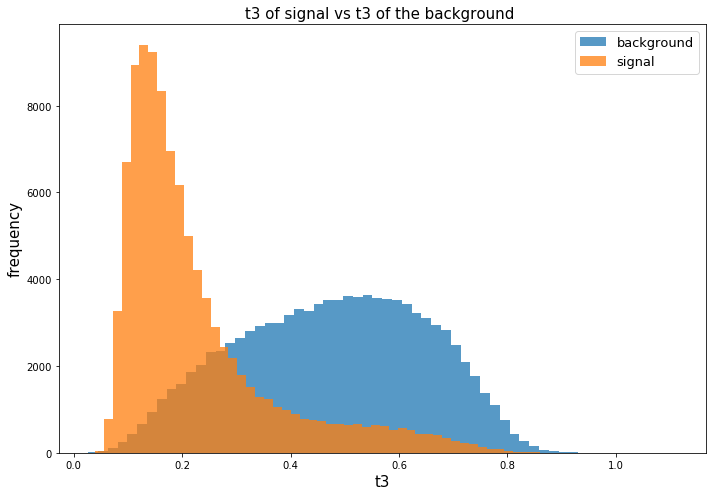

In [750]:
fig, axes = plt.subplots(figsize=(10,7))
alpha_n = 0.75
bin_size = 60
size = 15
leg_size = 13

axes.hist(t3_bkg, label = 'background', bins = bin_size, alpha=alpha_n)
axes.hist(t3, label = 'signal', bins = bin_size, alpha=alpha_n)
axes.set_xlabel('t3', fontsize=size)
axes.set_ylabel('frequency', fontsize=size)
axes.set_title("t3 of signal vs t3 of the background ", fontsize=size)
axes.legend(loc=1, fontsize=leg_size)

fig.tight_layout()

In [760]:
n_left = 0
n_right = 0.165

t3_cut = np.zeros(0,dtype=int) 
t3_bkg_cut = np.zeros(0,dtype=int) 
            
for i in range(0, t3.size):
    if t3[i]>= n_left and t3[i] <= n_right :
        t3_cut = np.append(t3_cut, t3[i])
        
for i in range(0, t3_bkg.size):
    if t3_bkg[i]>= n_left and t3_bkg[i] <= n_right :
        t3_bkg_cut = np.append(t3_bkg_cut, t3_bkg[i])

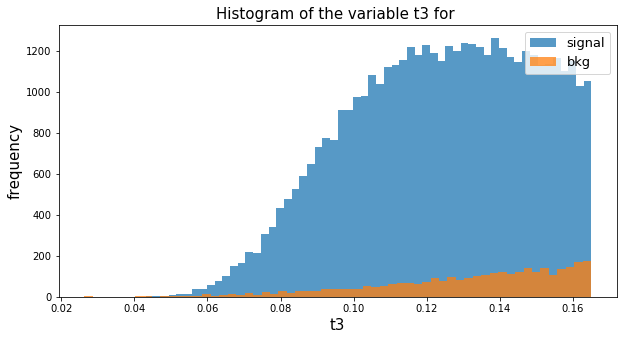

In [761]:
fig, axes = plt.subplots(figsize=(10,5))

bin_size = 60
plt.hist(t3_cut,label = 'signal', bins = bin_size, alpha = 0.75)
plt.hist(t3_bkg_cut,label = 'bkg', bins = bin_size, alpha = 0.75)

size = 15
leg_size = 13
axes.set_xlabel('t3', fontsize=size)
axes.set_ylabel('frequency', fontsize=size)
axes.set_title("Histogram of the variable t3 for ", fontsize=size)
axes.legend(loc=1, fontsize=leg_size);

In [762]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = N_higgs * (t3_cut.size/t3.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = N_qcd * (t3_bkg_cut.size/t3_bkg.size)
print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/math.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 44.15
The new expected yield number of qcd event = 637.40

The significance after the 1st cut = 1.75


Besides the mass, we can use t3 as an alternative discriminatory feature. If we cut the t3 data at 0 and 0.165, the signal significance goes up to 1.75. The enhacement is not as strong as the mass.

### Using the mass 

In [479]:
counts = np.bincount(mass)
print('The mean value of the mass = ',np.argmax(counts))
mean_value = np.argmax(counts)

n = 2
n_left = mean_value - n
n_right = mean_value + n

mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 

for i in range(0, mass.size):
    if mass[i]> n_left and mass[i] < n_right :
        mass_cut = np.append(mass_cut, mass[i])
        
for i in range(0, mass_bkg.size):
    if mass_bkg[i]> n_left and mass_bkg[i] < n_right :
        mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[i])

The mean value of the mass =  125


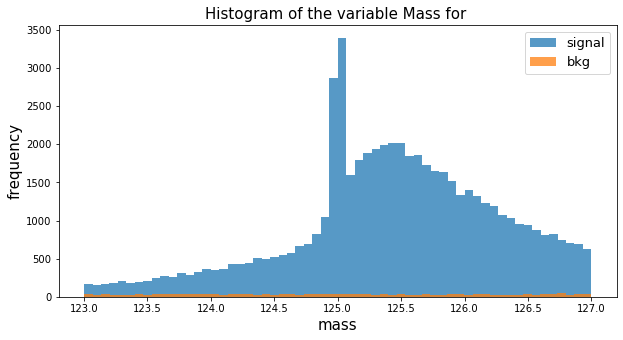

In [480]:
fig, axes = plt.subplots(figsize=(10,5))

bin_size = 60
plt.hist(mass_cut,label = 'signal', bins = bin_size, alpha = 0.75)
plt.hist(mass_bkg_cut,label = 'bkg', bins = bin_size, alpha = 0.75)

size = 15
leg_size = 13
axes.set_xlabel('mass', fontsize=size)
axes.set_ylabel('frequency', fontsize=size)
axes.set_title("Histogram of the variable Mass for ", fontsize=size)
axes.legend(loc=1, fontsize=leg_size);

In [481]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = N_higgs * (mass_cut.size/mass.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = N_qcd * (mass_bkg_cut.size/mass_bkg.size)
print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/math.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 56.93
The new expected yield number of qcd event = 391.00

The significance after the 1st cut = 2.88


# How to optimize event selections using multiple features

d2
t2 looks good

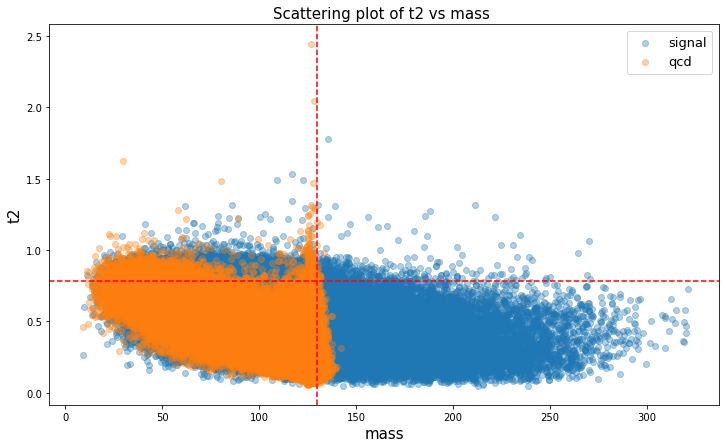

In [862]:
x = mass
y = t2

x2 = mass_bkg
y2 = t2_bkg
vertical_cut = 130
horizontal_cut = 0.78

fig, axes = plt.subplots(figsize=(12,7))

axes.scatter(x2, y2, alpha = 0.35, label = 'signal')
axes.scatter(x, y, alpha = 0.35,label = 'qcd');
axes.axvline(vertical_cut, color='r', linestyle="--")
axes.axhline(horizontal_cut, color='r', linestyle="--")

axes.set_xlabel('mass', fontsize=size)
axes.set_ylabel('t2', fontsize=size)
axes.set_title("Scattering plot of t2 vs mass ", fontsize=size)
axes.legend(loc=1, fontsize=leg_size);

In [872]:
n_left = 0.78

t2_cut = np.zeros(0,dtype=int) 
t2_bkg_cut = np.zeros(0,dtype=int) 
index = np.zeros(0,dtype=int) 
index_bkg = np.zeros(0,dtype=int) 

for i in range(0, mass.size):
    if t2[i]<= n_left:
        t2_cut = np.append(t2_cut, t2[i])
        index = np.append(index, i)
        
for i in range(0, t2_bkg.size):
    if t2_bkg[i]<= n_left:
        t2_bkg_cut = np.append(t2_bkg_cut, t2_bkg[i])
        index_bkg = np.append(index_bkg, i)

In [873]:
mass_cut = np.zeros(0,dtype=int) 
mass_bkg_cut = np.zeros(0,dtype=int) 

for i in range(0, index.size):
    mass_cut = np.append(mass_cut, mass[index[i]])
    
for i in range(0, index_bkg.size):
    mass_bkg_cut = np.append(mass_bkg_cut, mass_bkg[index_bkg[i]])

In [878]:
n_right = 130
 
mass_cut2 = np.zeros(0,dtype=int) 
mass_bkg_cut2 = np.zeros(0,dtype=int) 

for i in range(0, mass_cut.size):
    if mass_cut[i]>= n_right:
        mass_cut2 = np.append(mass_cut2, mass_cut[i])
        
for i in range(0, mass_bkg_cut.size):
    if mass_bkg_cut[i]>= n_right:
        mass_bkg_cut2 = np.append(mass_bkg_cut2, mass_bkg_cut[i])

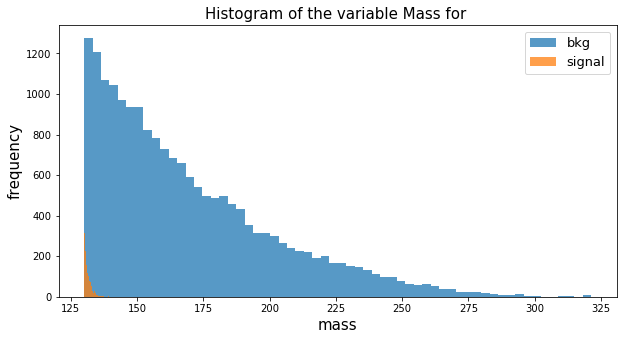

In [879]:
fig, axes = plt.subplots(figsize=(10,5))

bin_size = 60

plt.hist(mass_bkg_cut2,label = 'bkg', bins = bin_size, alpha = 0.75)
plt.hist(mass_cut2,label = 'signal', bins = bin_size, alpha = 0.75)

size = 15
leg_size = 13
axes.set_xlabel('mass', fontsize=size)
axes.set_ylabel('frequency', fontsize=size)
axes.set_title("Histogram of the variable Mass for ", fontsize=size)
axes.legend(loc=1, fontsize=leg_size);

In [881]:
# Calculating the new number of signal events, the new number of qcd events, and new siginal significance
N_higgs_cut = N_higgs * (mass_cut2.size/mass.size)

print('The new expected yield number of higgs event = {:.2f}'.format(N_higgs_cut))

N_qcd_cut = N_qcd * (mass_bkg_cut2.size/mass_bkg.size)
print('The new expected yield number of qcd event = {:.2f}'.format(N_qcd_cut))

print()

ratio = N_higgs_cut/math.sqrt(N_qcd_cut)
print('The significance after the 1st cut = {:.2f}'.format(ratio))

The new expected yield number of higgs event = 2.21
The new expected yield number of qcd event = 3772.40

The significance after the 1st cut = 0.04
